Q1. Write a Python function that takes in two arrays of data and calculates the F-value for a variance ratio
test. The function should return the F-value and the corresponding p-value for the test.

In [1]:
import numpy as np
from scipy.stats import f

def variance_ratio_test(data1, data2):
    # Convert the input data to NumPy arrays
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    # Calculate the variance of each dataset
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    
     # Ensure that var1 >= var2 for the F-test
    if var1 < var2:
        var1, var2 = var2, var1
        data1, data2 = data2, data1
        
    # Calculate the F-value
    f_value = var1 / var2
    
    # Calculate the degrees of freedom for the F-distribution
    df1 = len(data1) - 1
    df2 = len(data2) - 1
    
    # Calculate the p-value using the F-distribution
    p_value = 1 - f.cdf(f_value, df1, df2)
    
    return f_value, p_value

data1 = [10, 12, 15, 8, 11]
data2 = [14, 16, 12, 18, 20]

f_value, p_value = variance_ratio_test(data1, data2)
print("F-value:", f_value)
print("p-value:", p_value)

F-value: 1.492537313432836
p-value: 0.3537254080171972


Q2. Given a significance level of 0.05 and the degrees of freedom for the numerator and denominator of an
F-distribution, write a Python function that returns the critical F-value for a two-tailed test.

In [2]:
from scipy.stats import f

def critical_f_value(alpha, df_num, df_den):
    critical_f_val = f.ppf(1 - alpha / 2, df_num, df_den)
    
    return critical_f_val

alpha = 0.05
df_num = 3
df_den = 10

critical_f = critical_f_value(alpha, df_num, df_den)
print("Critical F-value:", critical_f)

Critical F-value: 4.825621493405406


Q3. Write a Python program that generates random samples from two normal distributions with known variances and uses an F-test to determine if the variances are equal. The program should output the F-value, degrees of freedom, and p-value for the test.

In [3]:
import numpy as np
from scipy.stats import f_oneway

def f_test_for_variances(data1, data2):
    # Convert the input data to NumPy arrays
    data1 = np.array(data1)
    data2 = np.array(data2)

    # Calculate the variances of each dataset
    var1 = np.var(data1, ddof=1)
    var2 = np.var(data2, ddof=1)
    
     # Ensure that var1 >= var2 for the F-test
    if var1 < var2:
        var1, var2 = var2, var1
        data1, data2 = data2, data1
    
    # Calculate the F-value and p-value using the F-test
    f_value, p_value = f_oneway(data1, data2)
    
    # Calculate the degrees of freedom for the F-distribution
    df_num = len(data1) - 1
    df_den = len(data2) - 1
    
    return f_value, df_num, df_den, p_value

# Example usage
data1 = np.random.normal(loc=10, scale=2, size=100)
data2 = np.random.normal(loc=12, scale=3, size=100)

f_value, df_num, df_den, p_value = f_test_for_variances(data1, data2)
print("F-value:", f_value)
print("Degrees of Freedom (numerator):", df_num)
print("Degrees of Freedom (denominator):", df_den)
print("p-value:", p_value)

F-value: 42.0615826733983
Degrees of Freedom (numerator): 99
Degrees of Freedom (denominator): 99
p-value: 6.910376057829185e-10


Q4.The variances of two populations are known to be 10 and 15. A sample of 12 observations is taken from
each population. Conduct an F-test at the 5% significance level to determine if the variances are
significantly different.

In [5]:
from scipy.stats import f

def f_test_for_variances(known_variance1, known_variance2, sample_size1, sample_size2, alpha=0.05):
    # Calculate the larger and smaller variances
    larger_var = max(known_variance1, known_variance2)
    smaller_var = min(known_variance1, known_variance2)
    
    # Calculate the F-value
    f_value = larger_var / smaller_var
    
    # Calculate the degrees of freedom for the F-distribution
    df_num = sample_size2 - 1
    df_den = sample_size1 - 1

    # Calculate the p-value using the F-distribution
    p_value = 1 - f.cdf(f_value, df_num, df_den)

    # Compare the p-value to the significance level
    is_different = p_value < alpha

    return f_value, df_num, df_den, p_value, is_different

# Example usage
known_variance1 = 10
known_variance2 = 15
sample_size1 = 12
sample_size2 = 12
alpha = 0.05

f_value, df_num, df_den, p_value, is_different = f_test_for_variances(known_variance1, known_variance2, sample_size1, sample_size2, alpha)

print("F-value:", f_value)
print("Degrees of Freedom (numerator):", df_num)
print("Degrees of Freedom (denominator):", df_den)
print("p-value:", p_value)
print("Variances are significantly different:", is_different)

F-value: 1.5
Degrees of Freedom (numerator): 11
Degrees of Freedom (denominator): 11
p-value: 0.25619489936789974
Variances are significantly different: False


Q5. A manufacturer claims that the variance of the diameter of a certain product is 0.005. A sample of 25
products is taken, and the sample variance is found to be 0.006. Conduct an F-test at the 1% significance
level to determine if the claim is justified.

In [2]:
from scipy.stats import f

def f_test_for_variance(sample_variance, claimed_variance, sample_size, alpha=0.01):
    # Calculate the F-value
    f_value = sample_variance / claimed_variance
    
    # Calculate the degrees of freedom for the F-distribution
    df_num = sample_size - 1
    df_den = sample_size - 1
    
    # Calculate the p-value using the F-distribution
    p_value = 2 * (1 - f.cdf(f_value, df_num, df_den))
    
    # Compare the p-value to the significance level
    is_claim_justified = p_value >= alpha
    
    return f_value, df_num, df_den, p_value, is_claim_justified

# Given data
sample_variance = 0.006
claimed_variance = 0.005
sample_size = 25
alpha = 0.01

f_value, df_num, df_den, p_value, is_claim_justified = f_test_for_variance(sample_variance, claimed_variance, sample_size, alpha)

print("F-value:", f_value)
print("Degrees of Freedom (numerator):", df_num)
print("Degrees of Freedom (denominator):", df_den)
print("p-value:", p_value)
print("Claim is justified:", is_claim_justified)

F-value: 1.2
Degrees of Freedom (numerator): 24
Degrees of Freedom (denominator): 24
p-value: 0.6587309365634488
Claim is justified: True


Q6. Write a Python function that takes in the degrees of freedom for the numerator and denominator of an
F-distribution and calculates the mean and variance of the distribution. The function should return the
mean and variance as a tuple.

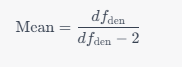 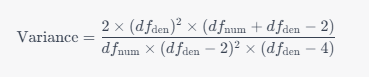

In [4]:
def f_distribution_properties(df_num, df_den):
    # Calculate the mean of the F-distribution
    mean = df_den / (df_den - 2)

    # Calculate the variance of the F-distribution
    variance = (2 * (df_den ** 2) * (df_num + df_den - 2)) / (df_num * (df_den - 2) ** 2 * (df_den - 4))

    return (mean, variance)

# Example usage
df_num = 5
df_den = 10

mean_variance = f_distribution_properties(df_num, df_den)
mean_variance

(1.25, 1.3541666666666667)

Q7. A random sample of 10 measurements is taken from a normal population with unknown variance. The
sample variance is found to be 25. Another random sample of 15 measurements is taken from another
normal population with unknown variance, and the sample variance is found to be 20. Conduct an F-test
at the 10% significance level to determine if the variances are significantly different.

In [5]:
from scipy.stats import f

def f_test_for_variances(sample_variance1, sample_variance2, sample_size1, sample_size2, alpha=0.10):
    # Calculate the larger and smaller sample variances
    larger_variance = max(sample_variance1, sample_variance2)
    smaller_variance = min(sample_variance1, sample_variance2)

    # Calculate the F-value
    f_value = larger_variance / smaller_variance
    
    # Calculate the degrees of freedom for the F-distribution
    df_num = sample_size1 - 1
    df_den = sample_size2 - 1

    # Calculate the p-value using the F-distribution
    p_value = 2 * (1 - f.cdf(f_value, df_num, df_den))
    
    # Compare the p-value to the significance level
    is_different = p_value < alpha

    return p_value, is_different

# Given data
sample_variance1 = 25
sample_variance2 = 20
sample_size1 = 10
sample_size2 = 15
alpha = 0.10

p_value, is_different = f_test_for_variances(sample_variance1, sample_variance2, sample_size1, sample_size2, alpha)

print("p-value:", p_value)
print("Variances are significantly different:", is_different)

p-value: 0.6832194382585954
Variances are significantly different: False


Q8. The following data represent the waiting times in minutes at two different restaurants on a Saturday
night: Restaurant A: 24, 25, 28, 23, 22, 20, 27; Restaurant B: 31, 33, 35, 30, 32, 36. Conduct an F-test at the 5%
significance level to determine if the variances are significantly different.

In [11]:
import numpy as np
from scipy.stats import f

def f_test_for_variances(data1, data2, alpha):
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    if var1 < var2:
        var1, var2 = var2, var1
        data1, data2 = data2, data1
    
    f_value = var1 / var2
    
    df_num = len(data1) - 1
    df_den = len(data2) - 1
    
    p_value = 1 - f.cdf(f_value, df_num, df_den)
    
    # Compare the p-value to the significance level
    is_different = p_value < alpha

    return p_value, is_different

Restaurant_A = [24, 25, 28, 23, 22, 20, 27] 
Restaurant_B = [31, 33, 35, 30, 32, 36]
alpha = 0.05

p_value, is_different = f_test_for_variances(Restaurant_A, Restaurant_B, alpha)

print("p-value:", p_value)
print("Variances are significantly different:", is_different)

p-value: 0.3374133569640825
Variances are significantly different: False


Q9. The following data represent the test scores of two groups of students: Group A: 80, 85, 90, 92, 87, 83;
Group B: 75, 78, 82, 79, 81, 84. Conduct an F-test at the 1% significance level to determine if the variances
are significantly different.

In [12]:
import numpy as np
from scipy.stats import f

def f_test_for_variances(data1, data2, alpha):
    data1 = np.array(data1)
    data2 = np.array(data2)
    
    var1 = np.var(data1)
    var2 = np.var(data2)
    
    if var1 < var2:
        var1, var2 = var2, var1
        data1, data2 = data2, data1
    
    f_value = var1 / var2
    
    df_num = len(data1) - 1
    df_den = len(data2) - 1
    
    p_value = 1 - f.cdf(f_value, df_num, df_den)
    
    # Compare the p-value to the significance level
    is_different = p_value < alpha

    return p_value, is_different

Group_A = [80, 85, 90, 92, 87, 83] 
Group_B = [75, 78, 82, 79, 81, 84]
alpha = 0.01

p_value, is_different = f_test_for_variances(Group_A, Group_B, alpha)

print("p-value:", p_value)
print("Variances are significantly different:", is_different)

p-value: 0.2415521774535344
Variances are significantly different: False
